In [173]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf


In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [175]:
data = pd.read_csv('/content/drive/MyDrive/sd솔데스크/팀 프로젝트/Proj_WT/DataSets/Seoul/SWeatherTour.csv')
data.head()

,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),최고해면기압 나타난날(yyyymmdd),최저해면기압 나타난날(yyyymmdd),평균수증기압(hPa),최고수증기압(hPa),최저수증기압(hPa),최고수증기압 나타난날(yyyymmdd),최저수증기압 나타난날(yyyymmdd),평균이슬점온도(°C),평균상대습도(%),최소상대습도(%),최소상대습도 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),소형총증발량(mm),소형일최대증발량(mm),대형총증발량(mm),대형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),대형일최대증발량 나타난날(yyyymmdd),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),최대풍속 풍향(16방위),...,최대풍속 나타난날(yyyymmdd),최대순간풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도(°C),최저초상온도 나타난날(yyyymmdd),평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),서울_종로구_경복궁,서울_종로구_종묘,서울_종로구_창경궁,서울_종로구_창덕궁,서울_중구_남산골한옥마을,서울_중구_덕수궁,서울_중구_서울시립미술관 본관,서울_용산구_국립중앙박물관,서울_노원구_태릉 · 강릉 · 조선왕릉전시관,서울_서대문구_서대문자연사박물관,서울_서대문구_서대문형무소역사관,서울_마포구_트릭아이미술관,서울_서초구_헌릉ㆍ인릉,서울_강남구_선릉·정릉
0,201101,-7.2,-3.4,-10.5,0.3,-17.8,20110114,20110116,1016.1,1027.3,1039.6,1014.9,20110127,20110111,2.0,4.5,0.7,20110123,20110116,-15.3,54,19,20110119,8.9,5.3,NaN,NaN,20110123,NaN,NaN,37.5,1.7,NaN,NaN,20110112,NaN,2.8,8.0,14.4,270,...,20110115,20110115,270,2.7,1.8,218.5,71.15,308.49,6.0,6.0,12.2,20110124.0,20110123.0,-16.1,-22.2,20110117,-4.7,-3.3,-2.7,-2.2,-1.1,1.5,5.3,8.3,14.6,17.2,141183,11486,17644,43677,72313,92135,234587,260272,1747,34551,18407,10128.0,736,13486.0
1,201102,1.2,5.9,-2.5,13.2,-9.2,20110226,20110212,1011.3,1022.1,1031.3,1007.6,20110215,20110208,3.7,8.1,1.3,20110227,20110225,-7.6,55,15,20110225,29.1,28.5,NaN,NaN,20110227,NaN,NaN,50.5,3.2,NaN,NaN,20110225,NaN,2.6,10.6,17.4,70,...,20110227,20110227,270,4.0,2.0,166.6,55.07,303.18,1.6,0.2,0.2,20110201.0,20110217.0,-9.6,-16.5,20110213,1.7,0.6,0.5,0.3,0.4,1.0,3.5,6.2,12.3,15.9,230814,17078,35708,73330,135771,132920,171376,224691,1943,20934,14387,15695.0,1730,18578.0
2,201103,3.6,8.3,-0.1,16.8,-5.5,20110331,20110303,1010.7,1021.4,1029.0,1011.4,20110326,20110320,4.1,9.5,0.9,20110313,20110316,-6.6,51,12,20110322,14.6,5.8,NaN,NaN,20110324,NaN,NaN,91.7,4.4,NaN,NaN,20110321,NaN,3.4,9.9,15.4,230,...,20110308,20110308,270,3.3,2.0,240.2,64.83,506.61,1.8,1.8,2.5,20110324.0,20110324.0,-5.0,-11.9,20110303,6.4,5.2,5.3,5.2,5.4,5.2,5.8,6.9,11.0,14.7,228276,22238,29856,78705,105735,64869,260687,184565,3000,18641,47554,11468.0,2085,22696.0
3,201104,10.7,15.6,6.8,19.0,4.3,20110415,20110401,1003.8,1014.1,1028.4,998.7,20110405,20110427,6.8,15.3,1.8,20110430,20110411,0.3,54,10,20110411,110.1,69.0,12.0,5.5,20110430,20110430.0,20110430.0,112.7,6.6,79.6,4.5,20110411,20110411.0,3.2,9.5,16.4,230,...,20110424,20110424,270,4.7,2.9,202.1,51.20,504.97,NaN,NaN,NaN,NaN,NaN,1.1,-4.7,20110401,13.6,12.2,12.1,11.7,11.7,10.7,10.0,9.6,10.8,13.5,349368,30470,70101,129150,176991,85548,56024,240861,8029,24078,66009,11577.0,5212,43184.0
4,201105,17.9,23.0,13.6,31.2,8.5,20110529,20110502,1000.8,1010.7,1017.1,999.8,20110524,20110501,11.1,22.4,4.8,20110509,20110514,7.9,57,15,20110508,53.4,15.0,3.5,1.5,20110520,20110520.0,20110520.0,134.6,8.0,95.1,5.4,20110529,20110514.0,2.8,9.7,16.4,200,...,20110519,20110513,250,5.6,2.8,180.4,41.02,529.85,NaN,NaN,NaN,NaN,NaN,8.9,3.2,20110504,21.0,19.4,19.1,18.5,18.2,16.3,14.6,13.4,11.9,13.2,438567,56106,78017,151833,188983,103100,279310,307969,17108,25593,72267,9507.0,6201,44836.0


In [176]:
data = data[['일시','평균기온(°C)','최고기온(°C)','최소상대습도(%)','평균상대습도(%)','월합강수량(00~24h만)(mm)','평균풍속(m/s)','합계 일조시간(hr)','서울_종로구_종묘']]
data = data.rename(columns = {'평균기온(°C)':'평균기온', '최고기온(°C)':'최고기온','최소상대습도(%)':'최저상대습도','평균상대습도(%)':'평균상대습도', '월합강수량(00~24h만)(mm)':'총강수량','평균풍속(m/s)':'평균풍속','합계 일조시간(hr)':'일조시간','서울_종로구_종묘':'target'})
data.head()

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,target
0,201101,-7.2,0.3,19,54,8.9,2.8,218.5,11486
1,201102,1.2,13.2,15,55,29.1,2.6,166.6,17078
2,201103,3.6,16.8,12,51,14.6,3.4,240.2,22238
3,201104,10.7,19.0,10,54,110.1,3.2,202.1,30470
4,201105,17.9,31.2,15,57,53.4,2.8,180.4,56106


# 종속변수 확인해 보기

Text(0.5, 1.0, 'target of distplot')

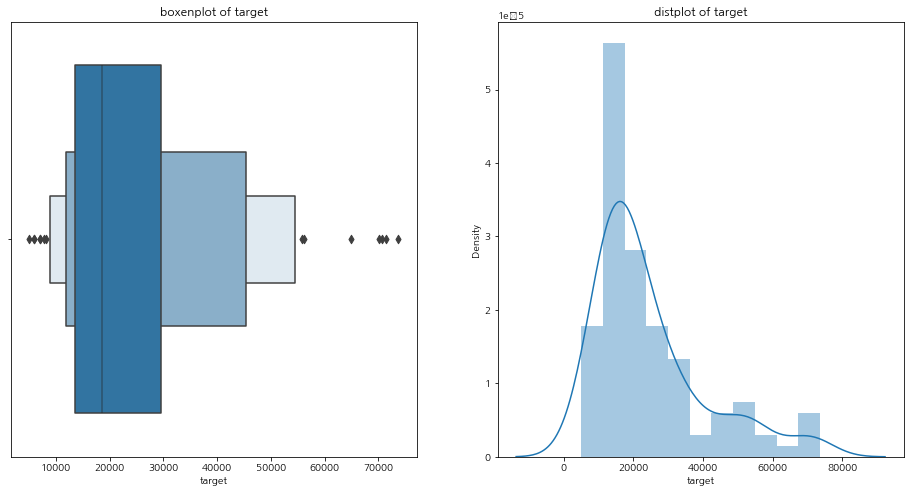

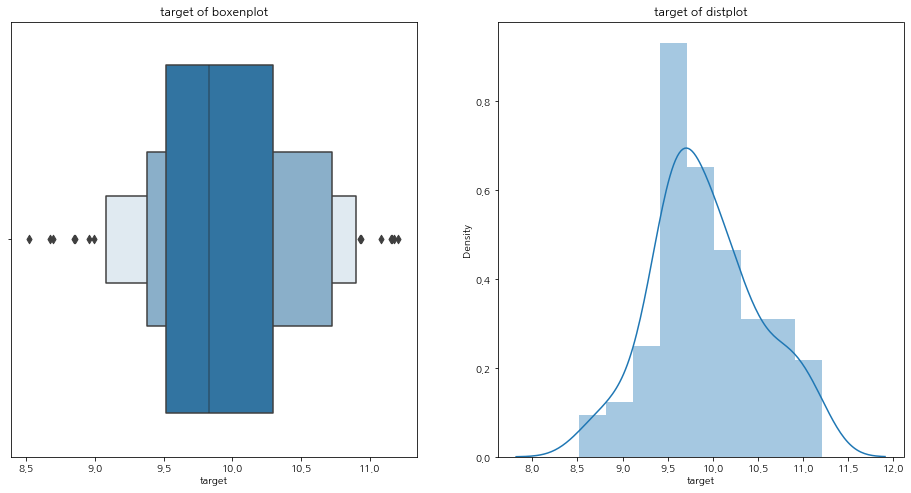

In [177]:
# 종속변수의 분포 확인해 보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(data['target'], ax = ax[0])
sns.distplot(data['target'], ax= ax[1])
ax[0].set_title('boxenplot of target')
ax[1].set_title('distplot of target')

# 중심을 맞춰주기 위해서 log를 씌워준다.
data['target'] = data['target'].apply(lambda x: np.log1p(x))

# 그래프를 그려서 분포를 확인한다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(data['target'], ax = ax[0])
sns.distplot(data['target'], ax = ax[1])
ax[0].set_title('target of boxenplot')
ax[1].set_title('target of distplot')

# EDA

In [178]:
data['일시'] = data['일시'].astype('str')

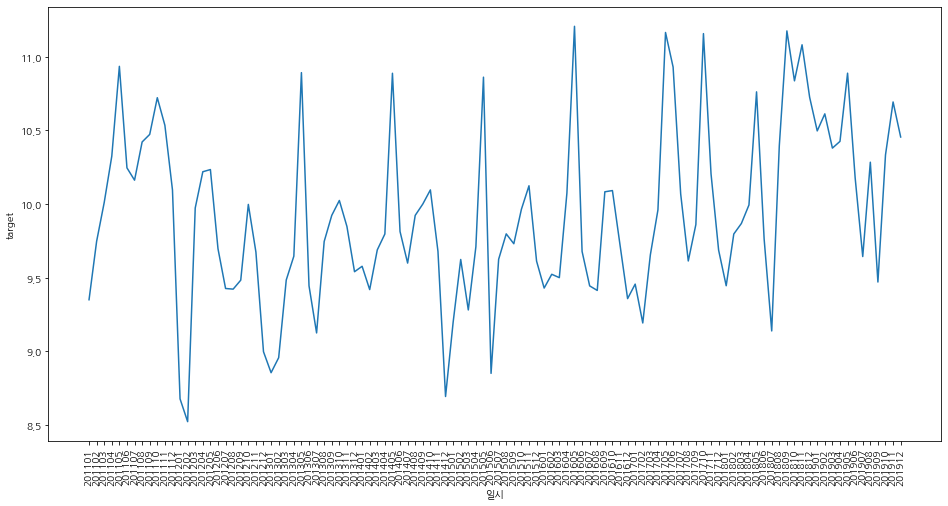

In [179]:
# 날짜별로 데이터 확인해 보기
plt.figure(figsize = (16,8))
sns.lineplot(data = data, x = '일시', y = 'target')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, '평균기온 distribution')

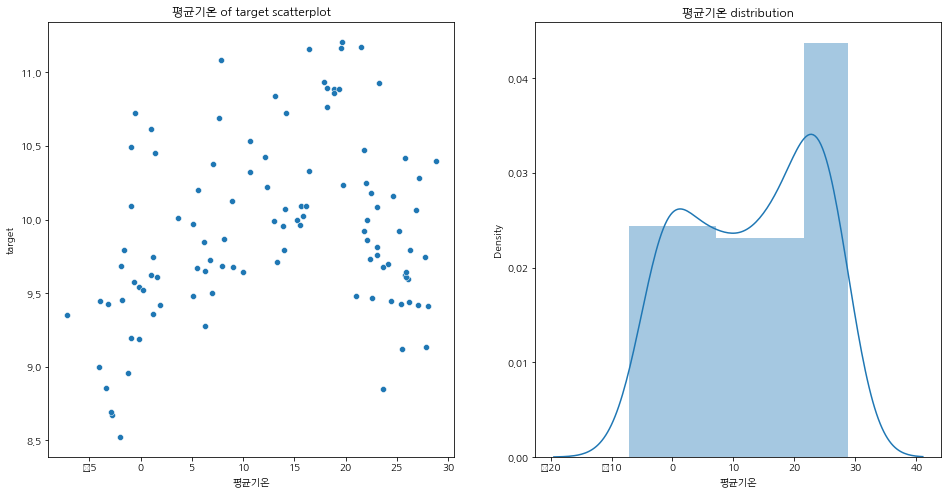

In [180]:
# 평균기온
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '평균기온', y = 'target', ax = ax[0])
sns.distplot(data['평균기온'], ax = ax[1])
ax[0].set_title('평균기온 of target scatterplot')
ax[1].set_title('평균기온 distribution')

Text(0.5, 1.0, '최고기온 distribution')

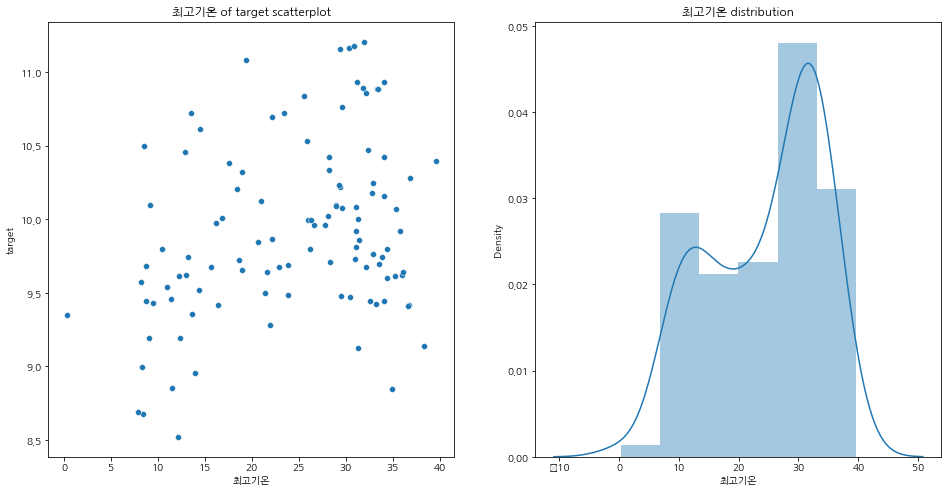

In [181]:
# 최고기온
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '최고기온', y = 'target', ax = ax[0])
sns.distplot(data['최고기온'], ax = ax[1])
ax[0].set_title('최고기온 of target scatterplot')
ax[1].set_title('최고기온 distribution')

Text(0.5, 1.0, '최저상대습도 distribution')

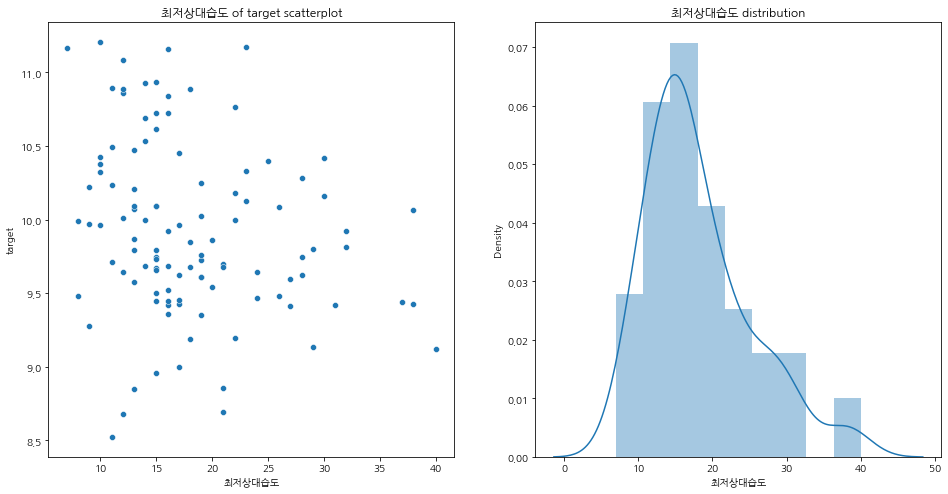

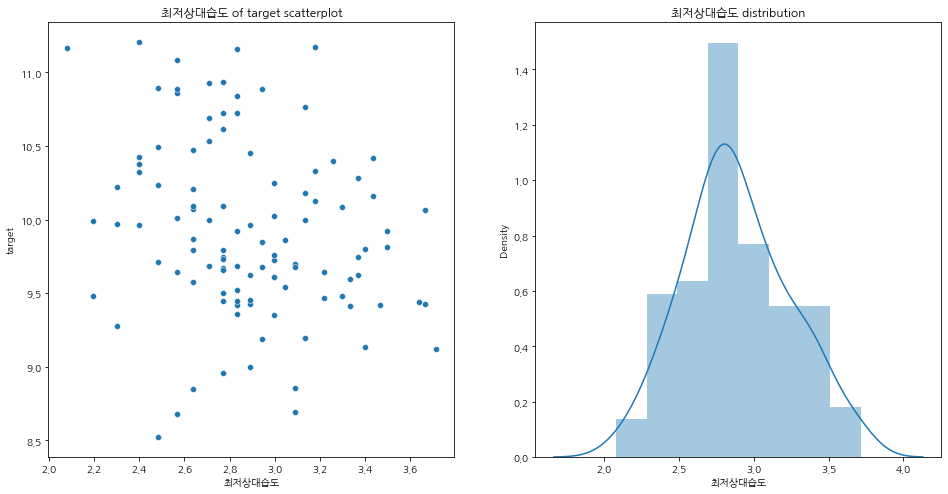

In [182]:
# 최저 상대 습도
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '최저상대습도', y = 'target', ax = ax[0])
sns.distplot(data['최저상대습도'], ax = ax[1])
ax[0].set_title('최저상대습도 of target scatterplot')
ax[1].set_title('최저상대습도 distribution')

# 정규분포를 위해서 log를 씌워주는게 좋을 것 같다.
data['최저상대습도'] = data['최저상대습도'].apply(lambda x:np.log1p(x))

fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '최저상대습도', y = 'target', ax = ax[0])
sns.distplot(data['최저상대습도'], ax = ax[1])
ax[0].set_title('최저상대습도 of target scatterplot')
ax[1].set_title('최저상대습도 distribution')

Text(0.5, 1.0, '평균상대습도 distribution')

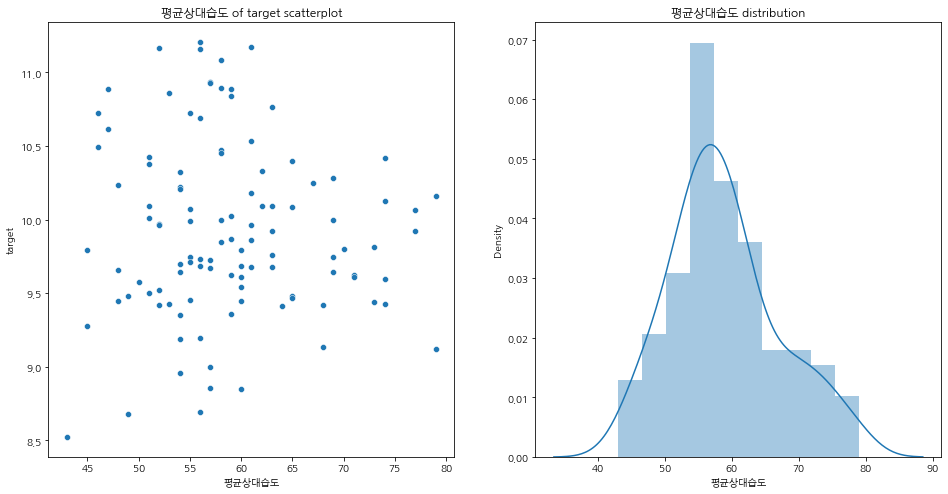

In [183]:
# 평균상대습도
# 평균상대습도는 정규화를 진행하지 않아도 데이터가 정규분포를 따르고 있다고 생각된다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '평균상대습도', y = 'target', ax = ax[0])
sns.distplot(data['평균상대습도'], ax = ax[1])
ax[0].set_title('평균상대습도 of target scatterplot')
ax[1].set_title('평균상대습도 distribution')

Text(0.5, 1.0, '총강수량 of distribution')

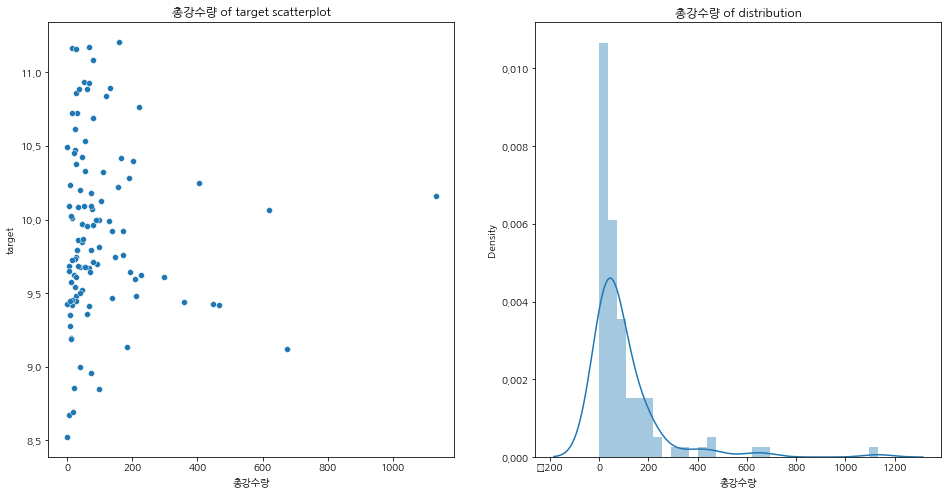

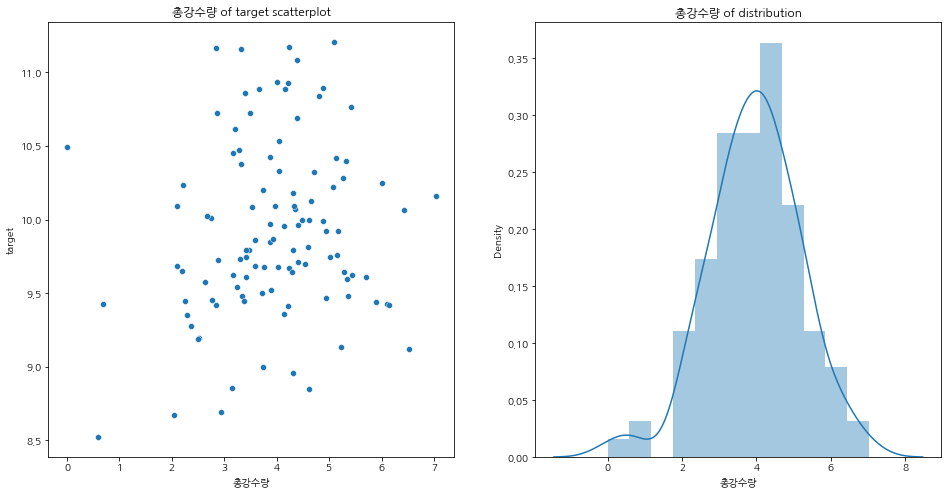

In [184]:
# 총강수량
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data =data, x = '총강수량', y = 'target', ax = ax[0])
sns.distplot(data['총강수량'], ax = ax[1])
ax[0].set_title('총강수량 of target scatterplot')
ax[1].set_title('총강수량 of distribution')

# log를 씌워서 정규분포를 만들어 주자.
data['총강수량'] = data['총강수량'].apply(lambda x: np.log1p(x))

# 그래프를 그려보자.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data =data, x = '총강수량', y = 'target', ax = ax[0])
sns.distplot(data['총강수량'], ax = ax[1])
ax[0].set_title('총강수량 of target scatterplot')
ax[1].set_title('총강수량 of distribution')

Text(0.5, 1.0, '평균풍속 distribution')

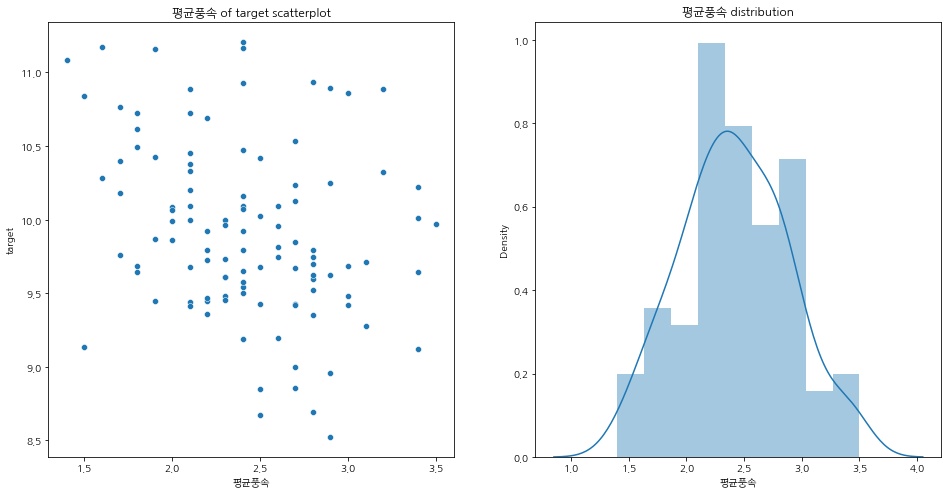

In [185]:
# 평균풍속
# 평균풍속은 정규분포를 따른다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '평균풍속', y = 'target', ax = ax[0])
sns.distplot(data['평균풍속'], ax = ax[1])
ax[0].set_title('평균풍속 of target scatterplot')
ax[1].set_title('평균풍속 distribution')

Text(0.5, 1.0, '일조시간 distribution')

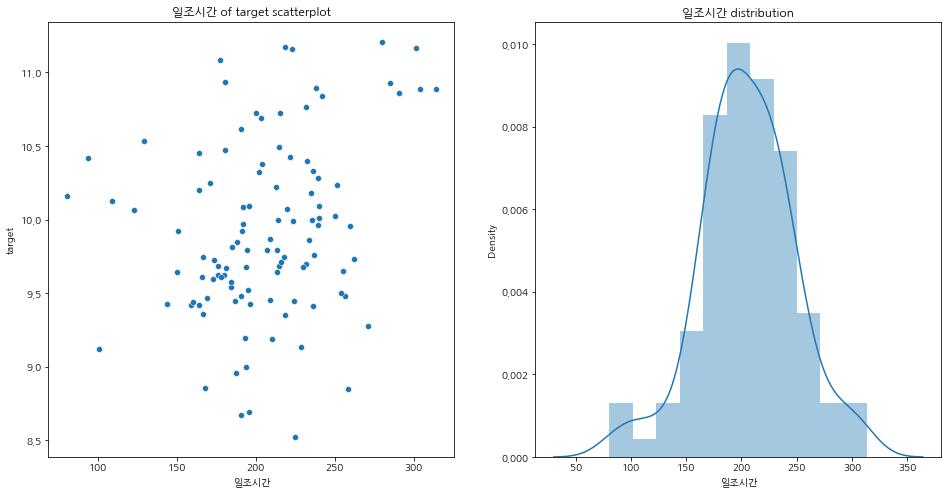

In [186]:
# 일조시간
fig, ax = plt.subplots(ncols = 2, figsize =(16,8))
sns.scatterplot(data = data, x = '일조시간', y = 'target', ax = ax[0])
sns.distplot(data['일조시간'], ax = ax[1])
ax[0].set_title('일조시간 of target scatterplot')
ax[1].set_title('일조시간 distribution')

# 여름철 체감온도, 겨울철 체감온도, 불쾌지수

In [187]:
# 그래프로 평균기온과 최고기온을 제외하고 정규분포를 따르는 것을 확인했다.
# 이것을 통해 이제 feature를 만들어주자.
class final_dataframe:
  # 여름철 체감온도
  def summer_feature(df = None):
    H = df['평균상대습도']
    T = df['평균기온'].apply(lambda x:32 + (1.8 * x))

    temperature = -42.379 + (2.04901523*T) + (10.14333127 * H) - (0.22475541 * T * H) - (6.83783 * (10 ** -3) * (T ** 2)) - (5.481717 * (10 ** -2)*(H ** 2)) + (1.22874 * (10 ** -3) * (T ** 2) * H) + (8.5282 * (10 ** -4) * T * (H **2)) - (1.99 * (10**-6) * (T**2) * (H**2))    
    df['여름철 체감온도'] = temperature

    return df

  # 겨울철 체감온도
  def winter_feature(df = None):
    T = df['평균기온']
    V = df['평균풍속']

    temperature = 13.12 + (0.6215 * T) - (11.37 * V ** 0.16) + (0.3965 *T*V **0.16)

    df['겨울철 체감온도'] = temperature
    return df

  # 불쾌지수 구하기
  def 불쾌지수(df = None):
    T = df['평균기온']
    H = df['평균상대습도']
    
    불쾌지수 = (9/5 * T) - (0.55 * (1 - H/100) * ((9/5 * T) - 26)) + 32

    df['불쾌지수'] = 불쾌지수

    return df

  def final_dataframe(df = None):
    df1=final_dataframe.summer_feature(df = df)
    df2=final_dataframe.winter_feature(df = df1)
    df3=final_dataframe.불쾌지수(df = df2)
    return df3

data = final_dataframe.final_dataframe(data)
data.head()

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,target,여름철 체감온도,겨울철 체감온도,불쾌지수
0,201101,-7.2,0.3,2.995732,54,2.292535,2.8,218.5,9.348971,220.263363,-8.127055,28.89688
1,201102,1.2,13.2,2.772589,55,3.404525,2.6,166.6,9.745605,149.388194,1.172017,40.06040
2,201103,3.6,16.8,2.564949,51,2.747271,3.4,240.2,10.009603,130.476121,3.264329,43.74064
3,201104,10.7,19.0,2.397895,54,4.710431,3.2,202.1,10.324531,97.020249,11.184697,52.96522
4,201105,17.9,31.2,2.772589,57,3.996364,2.8,180.4,10.935016,78.479349,19.207030,62.74897


# 년, 달, 계절의 변수 만들어 주기

In [188]:
# 년, 달, 계절의 변수 만들어 주기
def datetime(data):
  data['year'] = data['일시'].apply(lambda x: x[:4])
  data['month'] = data['일시'].apply(lambda x: x[4:])
  for i in data.index:
    if data.loc[i,'month'] in ['02','12','01']:
      data.loc[i,'weather'] = '겨울'
    elif data.loc[i,'month'] in ['03','04','05']:
      data.loc[i,'weather'] = '봄'
    elif data.loc[i,'month'] in ['06','07','08']:
      data.loc[i,'weather'] = '여름'
    else:
      data.loc[i,'weather'] = '가을'
  return data

data = datetime(data)

# 불쾌지수, 여름철 체감온도, 겨울철 체감온도 그래프로 확인해보기

- 분석을 진행면서 이 변수들이 전부 온도에 연관된 데이터이므로
- 온도의 분포인 쌍곡분포를 따라가는 것으로 보인다.
- 그러면 정규분포가 형성 되지 않기 때문에 어떻게 봐야할지 고민해 봐야겠다.

Text(0.5, 1.0, '불쾌지수 of target scatterplot')

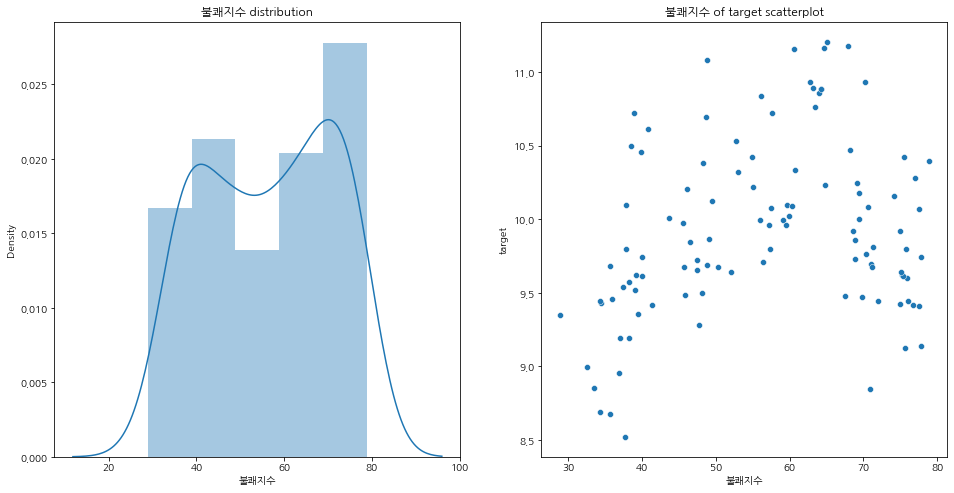

In [189]:
# 불쾌지수
fig, ax = plt.subplots(ncols =2 , figsize = (16,8))
sns.distplot(data['불쾌지수'], ax = ax[0])
sns.scatterplot(data = data, x = '불쾌지수', y = 'target', ax = ax[1])
ax[0].set_title('불쾌지수 distribution')
ax[1].set_title('불쾌지수 of target scatterplot')

Text(0.5, 1.0, '여름철 체감온도 of target scatterplot')

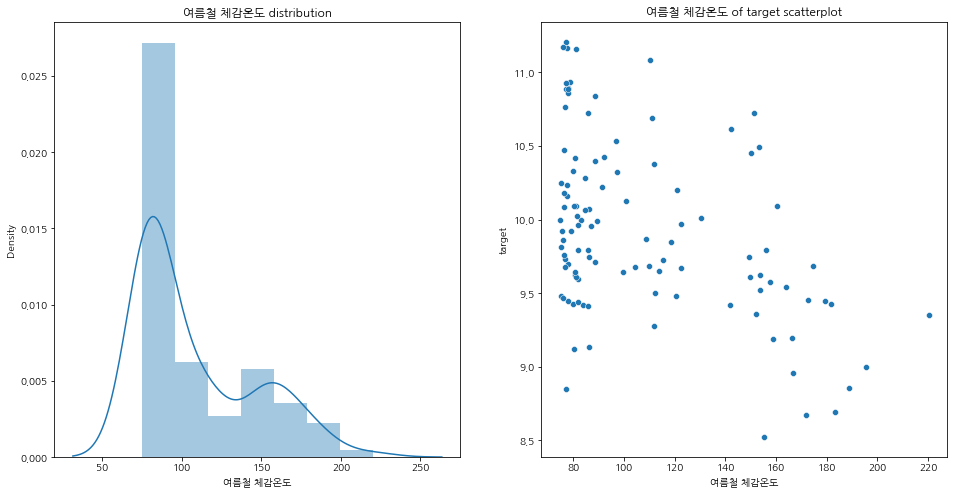

In [190]:
# 여름철 체감온도
fig, ax = plt.subplots(ncols =2 , figsize = (16,8))
sns.distplot(data['여름철 체감온도'], ax = ax[0])
sns.scatterplot(data = data, x = '여름철 체감온도', y = 'target', ax = ax[1])
ax[0].set_title('여름철 체감온도 distribution')
ax[1].set_title('여름철 체감온도 of target scatterplot')

Text(0.5, 1.0, '겨울철 체감온도 of target scatterplot')

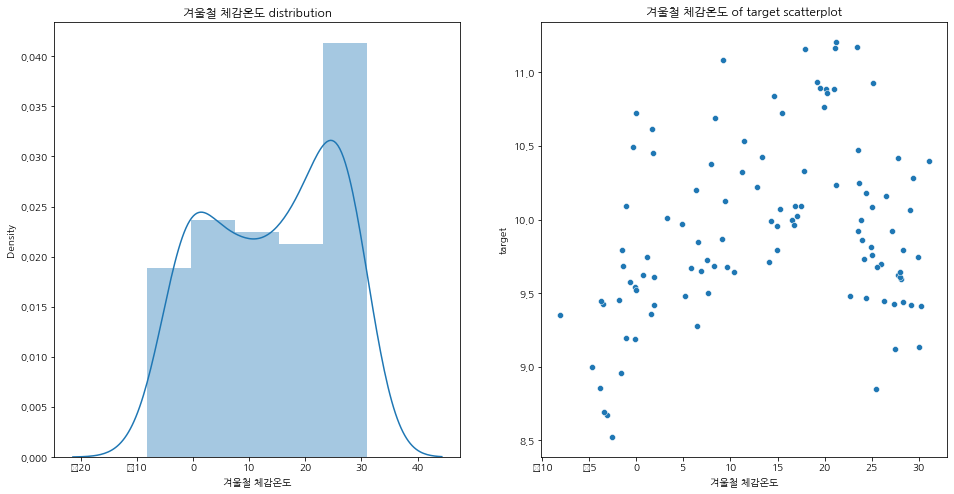

In [191]:
# 겨울철 체감온도
fig, ax = plt.subplots(ncols =2 , figsize = (16,8))
sns.distplot(data['겨울철 체감온도'], ax = ax[0])
sns.scatterplot(data = data, x = '겨울철 체감온도', y = 'target', ax = ax[1])
ax[0].set_title('겨울철 체감온도 distribution')
ax[1].set_title('겨울철 체감온도 of target scatterplot')

In [192]:
# 가정 1: 쌍곡분포의 곡선이 있기 때문에 쌍곡분포를 자르는 데이터 프레임을 2개 만들어서 모델을 각각 돌려보는게 어떨까?
# 봄 여름 -> 1, 가을 겨울 -> 2
data1 = data[data['평균기온'] >= 11]
data2 = data[data['평균기온'] < 11]

Text(0.5, 1.0, '평균기온 distribution data2')

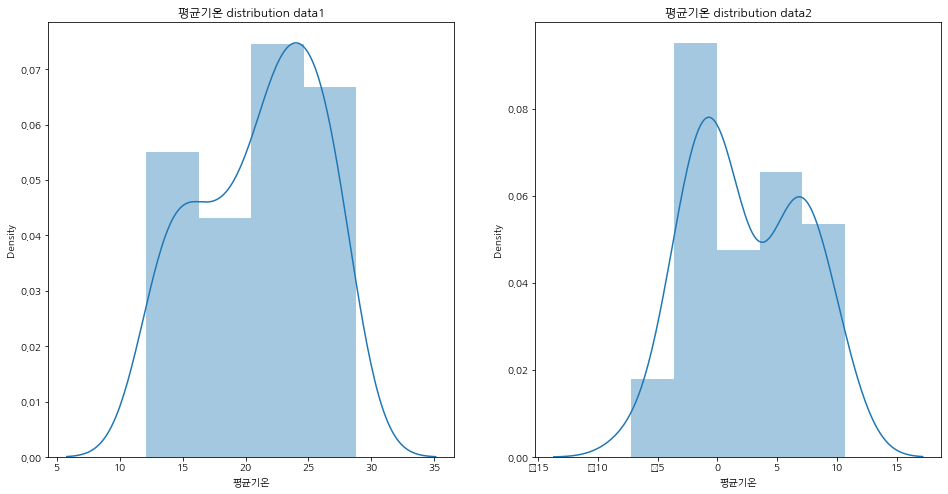

In [193]:
fig, ax = plt.subplots(ncols = 2,figsize = (16,8))
sns.distplot(data1['평균기온'], ax = ax[0])
sns.distplot(data2['평균기온'], ax = ax[1])
ax[0].set_title('평균기온 distribution data1')
ax[1].set_title('평균기온 distribution data2')

Text(0.5, 1.0, '겨울철 체감온도 distribution')

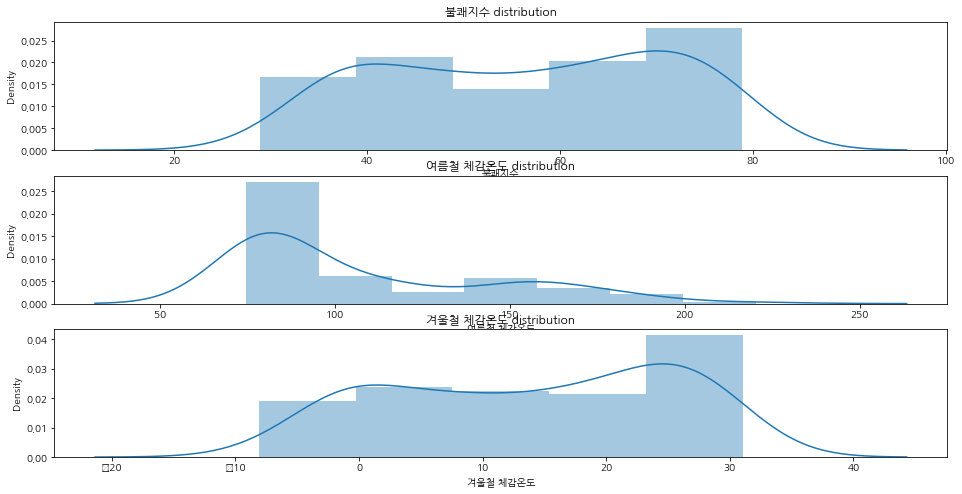

In [194]:
# 그래프를 분포로 확인해 보자.
fig, ax = plt.subplots(nrows = 3, figsize = (16,8))
sns.distplot(data['불쾌지수'], ax =  ax[0])
sns.distplot(data['여름철 체감온도'], ax = ax[1])
sns.distplot(data['겨울철 체감온도'], ax = ax[2])
ax[0].set_title('불쾌지수 distribution')
ax[1].set_title('여름철 체감온도 distribution')
ax[2].set_title('겨울철 체감온도 distribution')

In [195]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
# 모델을 돌려서 검증 해보자.

# 라벨인코더
le = LabelEncoder()
data1['weather'] = le.fit_transform(data1['weather'])
data2['weather'] = le.fit_transform(data2['weather'])

# 더미화
data1 = pd.get_dummies(data = data1, columns = ['month','weather'])
data2 = pd.get_dummies(data = data2, columns = ['month','weather'])

# 필요없는 컬럼 지워주기
drop = ['일시','year']
data1 = data1.drop(drop, axis = 1)
data2 = data2.drop(drop, axis = 1)

# 계절별로 온도가 정규화를 따르는지 확인해 보자.

Text(0.5, 1.0, '겨울 distribution')

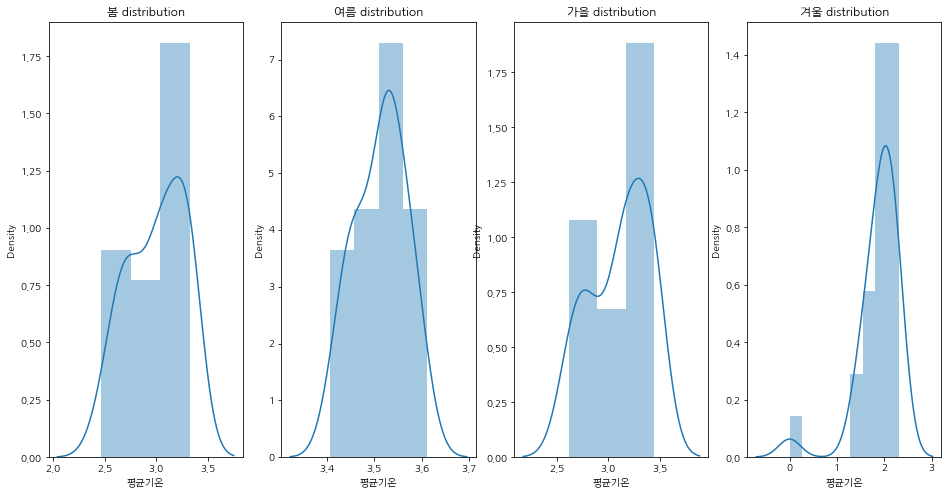

In [208]:
fig, ax = plt.subplots(ncols = 4, figsize = (16,8))
sns.distplot(data[data['weather'] == '봄']['평균기온'], ax = ax[0])
sns.distplot(data[data['weather'] == '여름']['평균기온'], ax = ax[1])
sns.distplot(data[data['weather'] == '가을']['평균기온'], ax = ax[2])
sns.distplot(data[data['weather'] == '겨울']['평균기온'], ax = ax[3])

ax[0].set_title('봄 distribution')
ax[1].set_title('여름 distribution')
ax[2].set_title('가을 distribution')
ax[3].set_title('겨울 distribution')

In [201]:
data['겨울철 체감온도'].apply(lambda x: np.log1p(x)).min()

-1.2515062873197786

In [202]:
columns = ['평균기온','최고기온','불쾌지수','여름철 체감온도','겨울철 체감온도']
for i in columns:
  data[i] = data[i].apply(lambda x: np.log1p(x + 7.2))

# statsmodels로 확인해보기

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   일시        108 non-null    object 
 1   평균기온      108 non-null    float64
 2   최고기온      108 non-null    float64
 3   최저상대습도    108 non-null    float64
 4   평균상대습도    108 non-null    int64  
 5   총강수량      108 non-null    float64
 6   평균풍속      108 non-null    float64
 7   일조시간      108 non-null    float64
 8   target    108 non-null    float64
 9   여름철 체감온도  108 non-null    float64
 10  겨울철 체감온도  108 non-null    float64
 11  불쾌지수      108 non-null    float64
 12  year      108 non-null    object 
 13  month     108 non-null    object 
 14  weather   108 non-null    object 
dtypes: float64(10), int64(1), object(4)
memory usage: 12.8+ KB


In [205]:
import statsmodels.api as sm
# statsmodels에 맞게 숫자형으로 바꿔주기
# 라벨인코더
df = data.copy()
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

# 더미화
df = pd.get_dummies(data = df, columns = ['month','weather'])

# 필요없는 컬럼 지워주기
drop = ['일시','year']
df = df.drop(drop, axis = 1)

# 통계표로 확인해 보기
X = df.drop('target', axis = 1)
y = df['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     6.342
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.94e-10
Time:                        16:11:06   Log-Likelihood:                -46.128
No. Observations:                 108   AIC:                             136.3
Df Residuals:                      86   BIC:                             195.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
평균기온           1.9320      1.307      1.478      0.1

In [206]:
# 계절별로 statsmodels 확인해 보기
df = data.copy()

겨울_df = df[df['weather'] == '겨울']
가을_df = df[df['weather'] == '가을']
여름_df = df[df['weather'] == '여름']
봄_df = df[df['weather'] == '봄']

# 더미화
겨울_df = pd.get_dummies(data = 겨울_df, columns = ['month'])
가을_df = pd.get_dummies(data = 가을_df, columns = ['month'])
여름_df = pd.get_dummies(data = 여름_df, columns = ['month'])
봄_df = pd.get_dummies(data = 봄_df, columns = ['month'])

# 필요없는 컬럼 지워주기
drop = ['일시','year','weather','여름철 체감온도']
겨울_df = 겨울_df.drop(drop, axis = 1)
가을_df = 가을_df.drop(drop, axis = 1)
여름_df = 여름_df.drop(drop, axis = 1)
봄_df = 봄_df.drop(drop, axis = 1)

# 통계표로 확인해 보기
# 겨울
X = 겨울_df.drop('target', axis = 1)
y = 겨울_df['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
print('=======================================================================================================================================================================')

# 가을
X = 가을_df.drop('target', axis = 1)
y = 가을_df['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
print('=======================================================================================================================================================================')

# 여름
X = 여름_df.drop('target', axis = 1)
y = 여름_df['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
print('=======================================================================================================================================================================')

# 봄
X = 봄_df.drop('target', axis = 1)
y = 봄_df['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     3.463
Date:                Thu, 08 Jul 2021   Prob (F-statistic):             0.0139
Time:                        16:11:06   Log-Likelihood:                -5.9790
No. Observations:                  27   AIC:                             35.96
Df Residuals:                      15   BIC:                             51.51
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
평균기온           3.9417      4.420      0.892      0.3

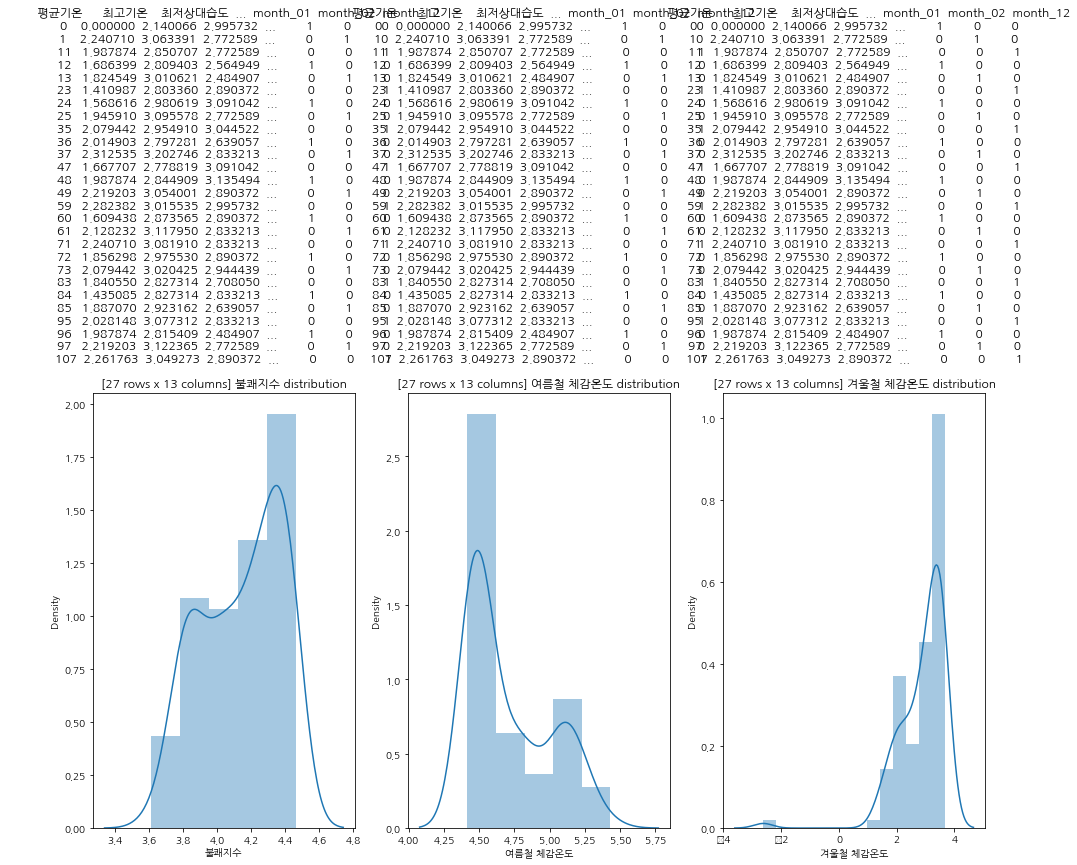

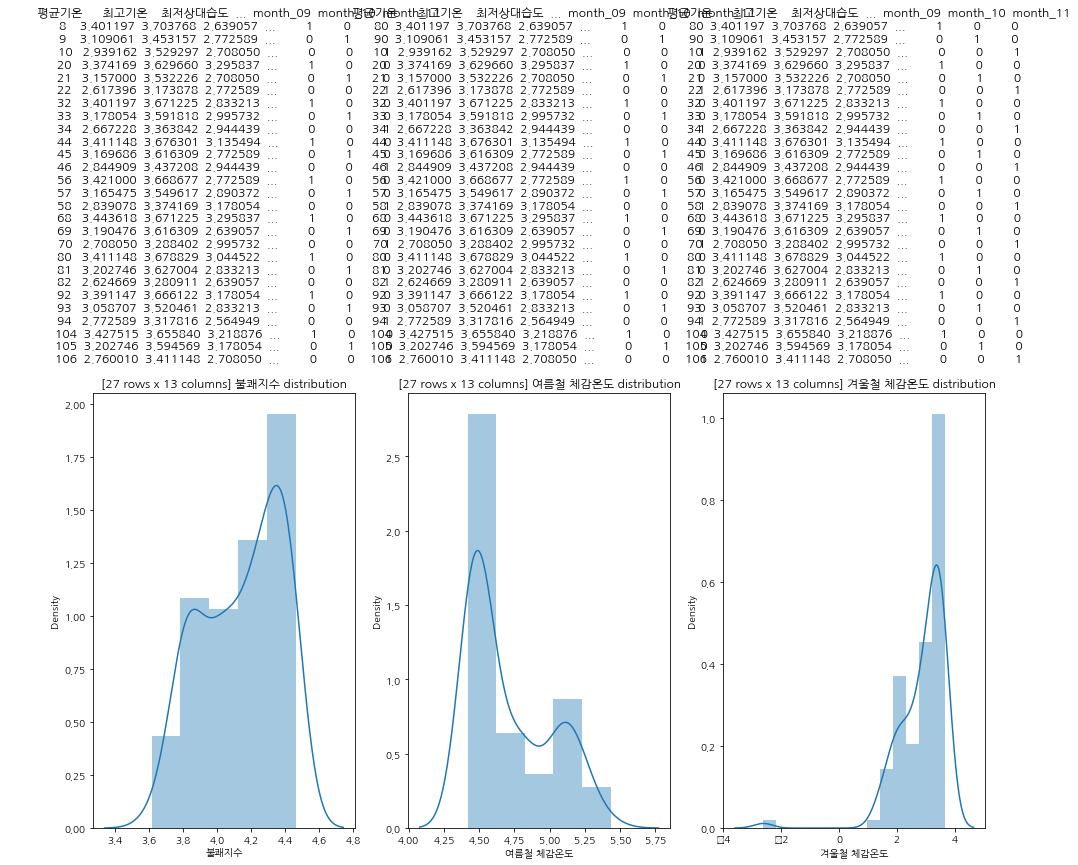

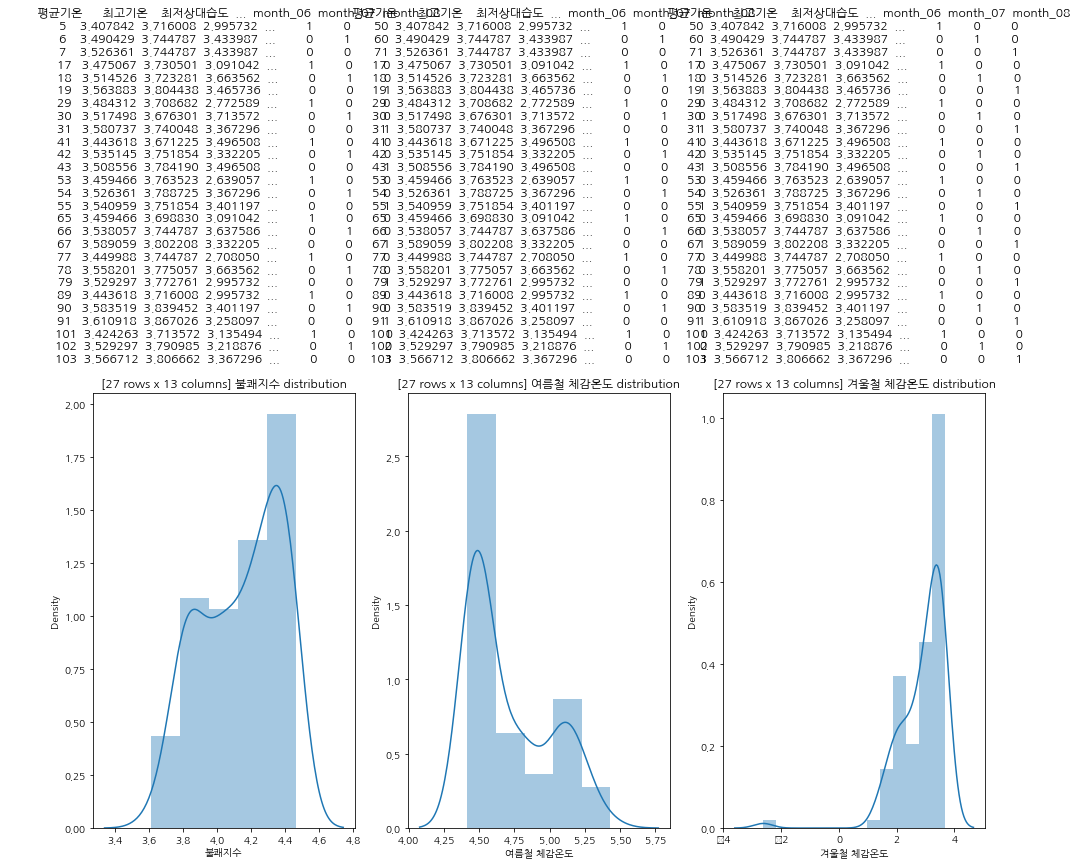

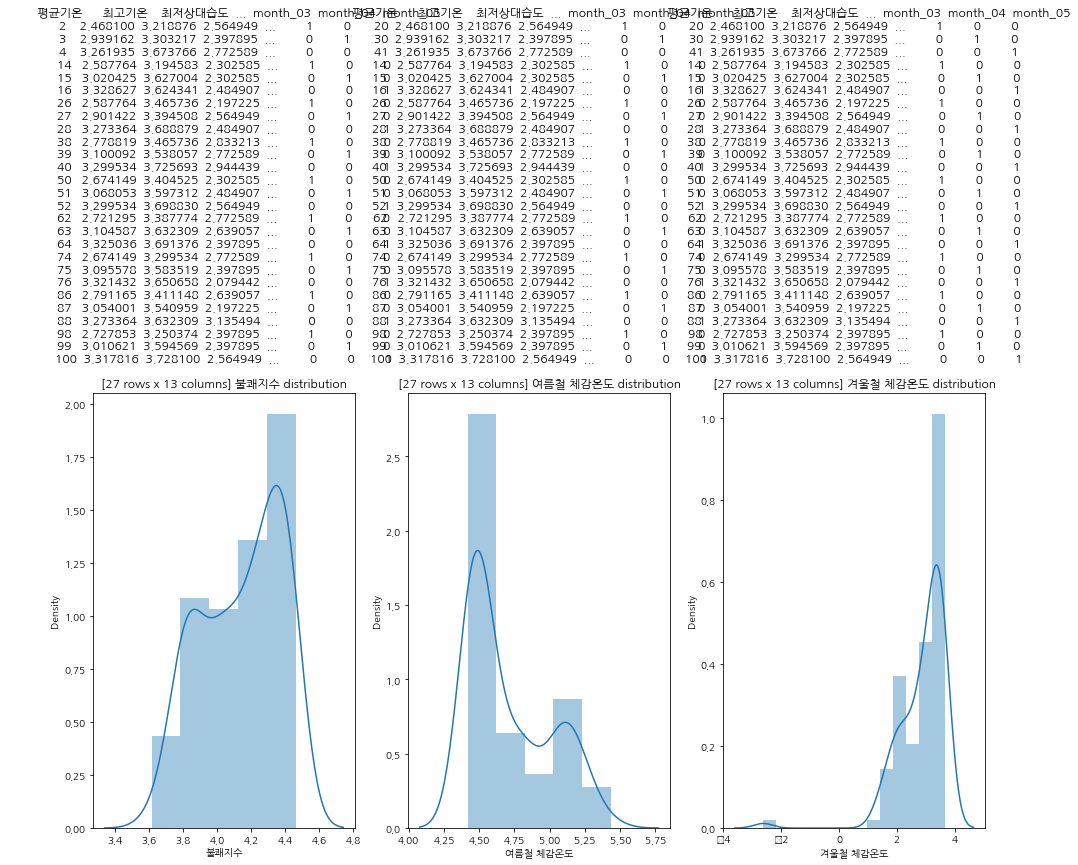

In [210]:
# 정규분포로 바뀌지 않았다. 그냥 잘랜다. 이런 젠장할 내가 이거 정규분포 만든다고 흐이남흐니ㅏ으ㅜ히'ㅁ눙['훈'ㅣ아ㅜㄹ'ㅣㅜㄴㅇ마ㅣ'룸ㄴㅇ'ㅣㄹ 잔다 바이]
dataframe = [겨울_df, 가을_df, 여름_df, 봄_df]

for i in dataframe:
  fig, ax = plt.subplots(ncols = 3, figsize = (16,8))
  sns.distplot(data['불쾌지수'], ax = ax[0])
  sns.distplot(data['여름철 체감온도'], ax = ax[1])
  sns.distplot(data['겨울철 체감온도'], ax = ax[2])
  ax[0].set_title(f'{i} 불쾌지수 distribution')
  ax[1].set_title(f'{i} 여름철 체감온도 distribution')
  ax[2].set_title(f'{i} 겨울철 체감온도 distribution')
  plt.show()